In [36]:
import pandas as pd

# Load the data with appropriate encoding
df = pd.read_csv("C:/Users/DELL/Desktop/movies/IMDb Movies India.csv", encoding="ISO-8859-1")

# Show top rows
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [37]:
# Overview of dataset
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [38]:
df.dropna(how='all', inplace=True)

In [39]:
df = df[df['Rating'].notnull()]

In [40]:
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(float)

In [41]:
df['Duration'] = df['Duration'].str.replace('min', '').str.strip()
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [42]:
# Fill missing genres, directors, actors with 'Unknown'
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].fillna('Unknown')

# One-hot encode top genres (simplified)
df['Main Genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if ',' in x else x)

# Create dummy variables for top genres
top_genres = df['Main Genre'].value_counts().nlargest(10).index
df['Main Genre'] = df['Main Genre'].apply(lambda x: x if x in top_genres else 'Other')
genre_dummies = pd.get_dummies(df['Main Genre'], prefix='Genre')
df = pd.concat([df, genre_dummies], axis=1)


In [43]:
# Drop unused columns for modeling
df_cleaned = df.drop(columns=['Name', 'Genre', 'Main Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

# Drop rows with missing values after cleaning
df_cleaned.dropna(inplace=True)

# View final structure
df_cleaned.head()


,Year,Duration,Rating,Votes,Genre_Action,Genre_Adventure,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Musical,Genre_Other,Genre_Romance,Genre_Thriller
1,2019.0,109.0,7.0,8,False,False,False,False,False,True,False,False,False,False,False
3,2019.0,110.0,4.4,35,False,False,True,False,False,False,False,False,False,False,False
5,1997.0,147.0,4.7,827,False,False,True,False,False,False,False,False,False,False,False
6,2005.0,142.0,7.4,"1,086",False,False,False,False,False,True,False,False,False,False,False
8,2012.0,82.0,5.6,326,False,False,False,False,False,False,True,False,False,False,False


In [44]:
# Remove commas and convert Votes to float
df_cleaned['Votes'] = df_cleaned['Votes'].str.replace(',', '').astype(float)


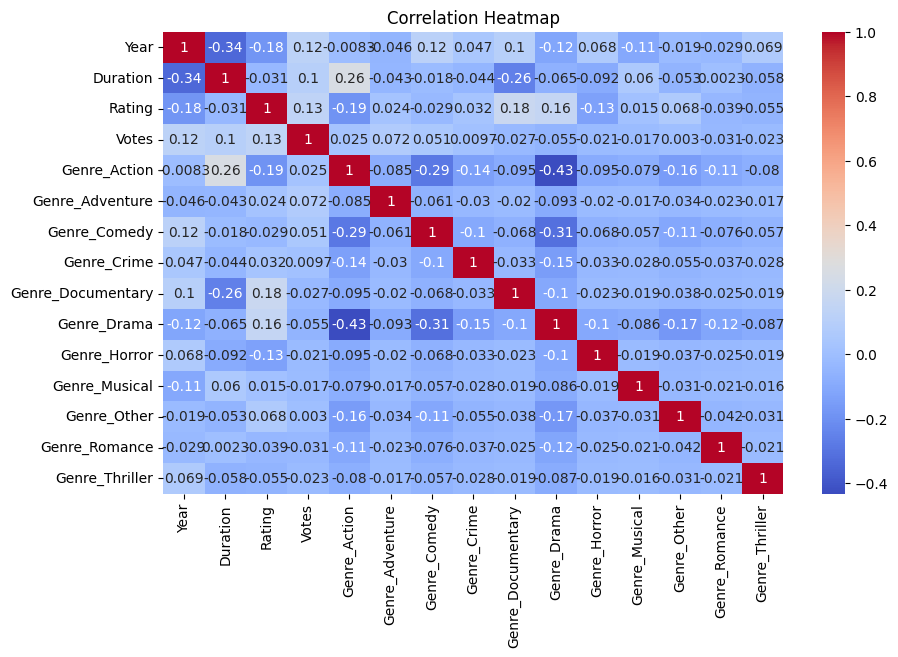

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


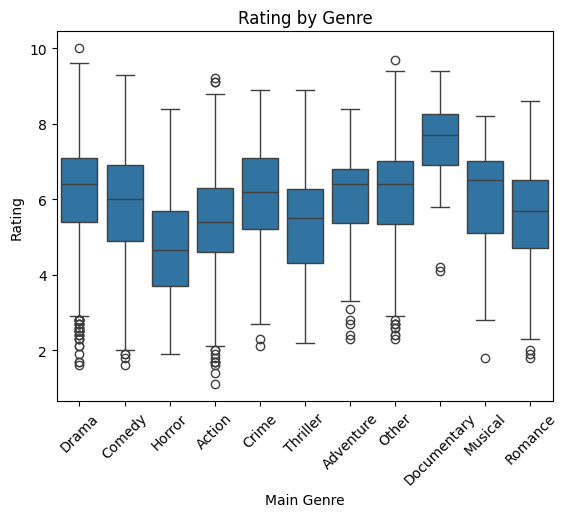

In [30]:
sns.boxplot(x='Main Genre', y='Rating', data=df)
plt.xticks(rotation=45)
plt.title("Rating by Genre")
plt.show()


In [31]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=["Rating"])
y = df_cleaned["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, X_test, y_test, name):
    preds = model.predict(X_test)
    print(f"{name} Results:")
    print("MSE:", mean_squared_error(y_test, preds))
    print("R²:", r2_score(y_test, preds))
    print("-" * 30)

evaluate(lr, X_test, y_test, "Linear Regression")
evaluate(rf, X_test, y_test, "Random Forest")


Linear Regression Results:
MSE: 1.634404752962075
R²: 0.12153168476114529
------------------------------
Random Forest Results:
MSE: 1.3098045992485055
R²: 0.2959994533125069
------------------------------


In [48]:

joblib.dump((rf, X.columns.tolist()), "movie_rating_model.pkl")



['movie_rating_model.pkl']